# Задание 1

## Задача

У нас есть датасет клиентов банка со многими анонимными признаками и колонка "TARGET", которая обозначает доволен клиент, или нет. 1 - недоволен, 0 - доволен.
Задача состоит в построении модели, которая сможет предсказывать недовольство клиентов.<br>
Ниже оригинальное описание:

You are provided with an anonymized dataset containing a large number of numeric variables. The "TARGET" column is the variable to predict. It equals 1 for unsatisfied customers and 0 for satisfied customers.

The task is to predict the probability that each customer in the test set is an unsatisfied customer.

File descriptions<br>
train.csv - the training set including the target<br>
test.csv - the test set without the target<br>
sample_submission.csv - a sample submission file in the correct format

Ссылка на соревнование:<br>
https://www.kaggle.com/c/santander-customer-satisfaction/overview

In [69]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv('D:/Notebooks/Santander_customer_satisfaction/train.csv')
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
train.shape

(76020, 371)

In [4]:
#Оценим считанные данные
train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,76020.0,75964.050723,43781.947379,1.00,38104.7500,76043.00,113748.7500,151838.00
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
imp_op_var39_comer_ult3,76020.0,119.529632,546.266294,0.00,0.0000,0.00,0.0000,21024.81
imp_op_var40_comer_ult1,76020.0,3.559130,93.155749,0.00,0.0000,0.00,0.0000,8237.82
imp_op_var40_comer_ult3,76020.0,6.472698,153.737066,0.00,0.0000,0.00,0.0000,11073.57
imp_op_var40_efect_ult1,76020.0,0.412946,30.604864,0.00,0.0000,0.00,0.0000,6600.00
imp_op_var40_efect_ult3,76020.0,0.567352,36.513513,0.00,0.0000,0.00,0.0000,6600.00


Всего признаков очень много, причем все они анонимные, таким образом в расшировке его значения можно полагаться лишь
на его значение и название, а так же обсуждения участников соревнования.<br>
Некоторые из них уже удалось расшифровать:<br>
https://www.kaggle.com/cast42/exploring-features#num_var4-:-number-of-bank-products<br>
Признаки, начинающиеся на 'ind' обозначают какие-либо индексы, меняясь между 0 и 1. Сказать, что эти индексы означают
точно не могу.
Из переводу гугла я нашел, что 'saldo medio' - 'average amount', 'corto' - 'short time', 'largo' - 'long time'.
К тому же "Сальдо" - тоже известный термин, означающий разницу между поступлениями и расходами на счет. Таким образом
можно предположить, что эти переменные относятся к изменению баланса счетов клиентов за определенные промежутки времени.
Но почему их так много и каких именно счетов это изменения пока не понятно

В целом понять, пропущенное это значение, или валидное довольно сложно, так как неизвестен физический смысл переменной, а значит и область ее значений.
Но в признаке var3 выбросы отмечены явно (-999999). Возможно, пропущенных значений больше нет, иначе они были бы отмечены подобным образом.


## Var3

 var3 предполагается как национальность клиентов банка, поэтому -999999 является fill значением, которое нужно обработать

In [5]:
train['var3'].value_counts()[:15]


 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
 6            82
 0            75
 10           72
 11           66
 5            63
Name: var3, dtype: int64

Подавляющее кол-во клиентов имеет национальность 2

In [6]:
train = train.replace(-999999,2)

Замена самым популярным обусловлена тем, что этот признак категориальный (национальность)

In [7]:
train[train.var3==-999999].shape

(0, 371)

## Var4

num_var4, судя по обсуждению, предполагается как количество приобретенных продуктов у банка
но вполне может быть и не так. В любом случае, рассмотрим этот признак подробнее

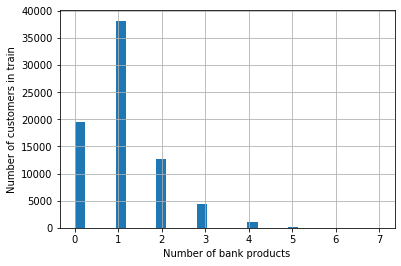

In [8]:

train.num_var4.hist(bins=30)
plt.xlabel('Number of bank products')
plt.ylabel('Number of customers in train')
plt.show()

Большинство клиентов имеют лишь один продукт. Странно, что это переменная так же обладает нулевым значением.
Возможно, я не совсем правильно понял интерпретацию.

Text(0, 0.5, 'Number of unsatisfied customers in train')

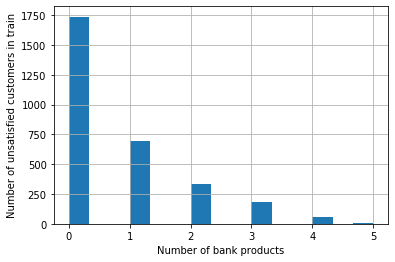

In [9]:
train[train.TARGET==1].num_var4.hist(bins=15)
plt.xlabel('Number of bank products')
plt.ylabel('Number of unsatisfied customers in train')

Но среди недовольных клиентов большинство не имеют продуктов банка. (???)

## Var15

var15 - возраст клиента(предположительно)

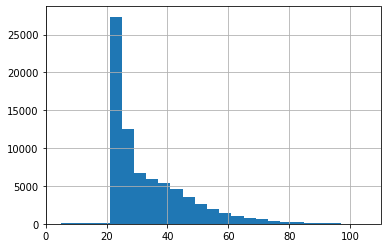

In [10]:

train['var15'].hist(bins=25)

Больш-во клиентов молодые (а учитывая, что специалисты людей до 45 считают молодыми - подавляющее боль-во)

D:\Anaconda\envs\facebook_RCNN\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


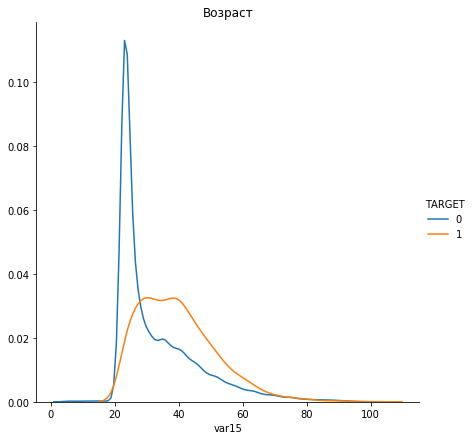

In [11]:
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('Возраст');

Недовольные клиенты в основном старше довольных.

Пока что это все расшифрованные признаки с точной интерпретацией, что я нашел. Наверняка их больше.

## Дизбаланс классов

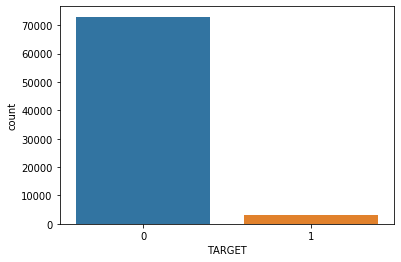

In [12]:
sns.countplot(train['TARGET'])

In [13]:
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


## Корреляция

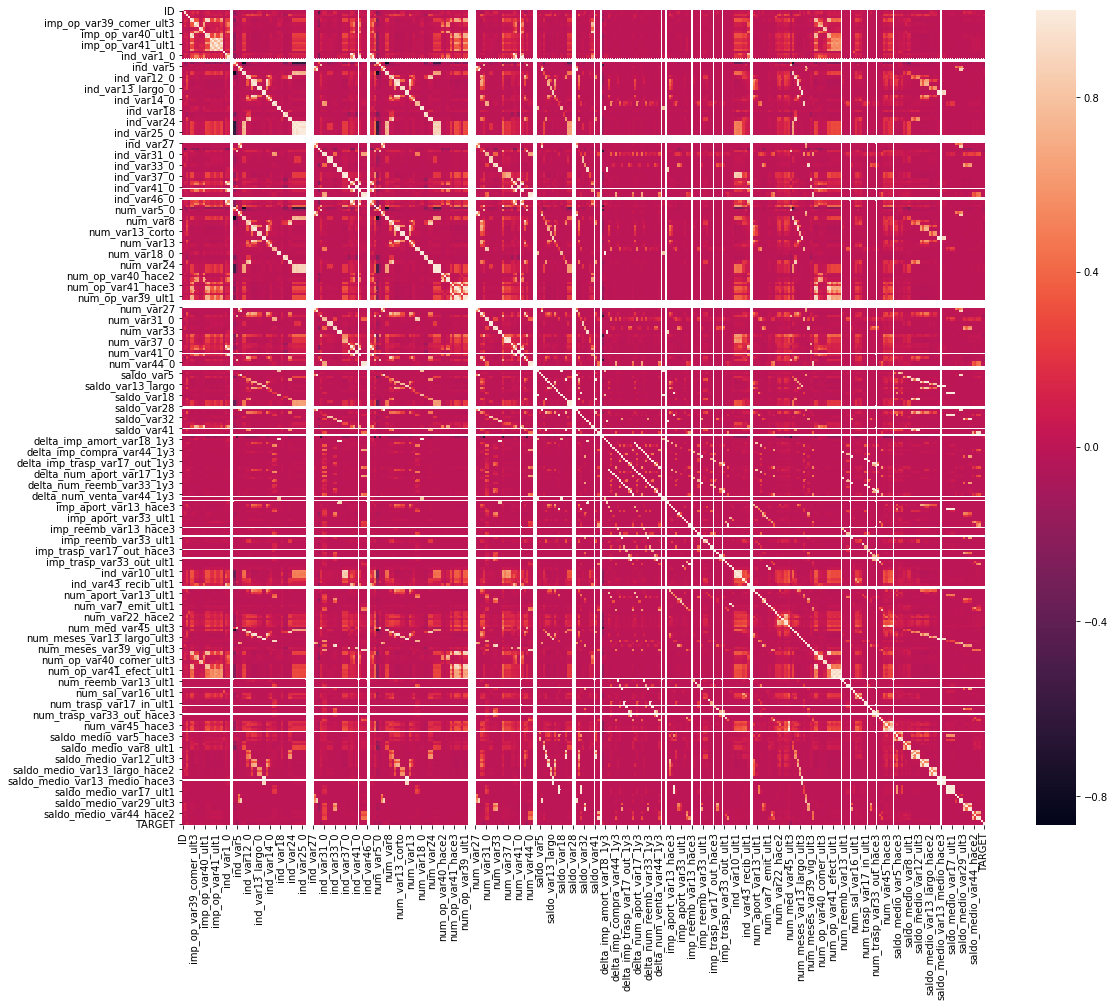

In [14]:
cor_mat = train.corr()
f, ax = plt.subplots(figsize=(18, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat, ax=ax);

In [15]:
threshold = 0.7 #Высокая по шкале Чеддока
important_corrs = (cor_mat[abs(cor_mat) > threshold][cor_mat != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

unique_important_corrs = unique_important_corrs.loc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs

,attribute pair,correlation
467,"(ind_var6, num_var6)",1.000000
530,"(ind_var6, num_var29)",1.000000
493,"(ind_var29, num_var29)",1.000000
92,"(ind_var29, num_var6)",1.000000
184,"(delta_imp_trasp_var33_out_1y3, num_trasp_var3...",1.000000
654,"(delta_num_trasp_var33_out_1y3, num_trasp_var3...",1.000000
101,"(delta_num_reemb_var33_1y3, num_reemb_var33_ult1)",1.000000
14,"(delta_imp_reemb_var33_1y3, num_reemb_var33_ult1)",1.000000
439,"(ind_var20_0, num_var20_0)",1.000000
89,"(delta_num_reemb_var13_1y3, num_reemb_var13_ult1)",1.000000


Кол-во коррелирующих признаков очень большое. Но если присмотреться к названиям, то можно заметить одну и ту же цифру в названиях. Тогда это имеет смысл, так как эти признаки исходят из одних данных.

Возьмем только признаки-индексы и посмотрим на их друг с другом корреляцию

In [16]:
# 
index_train = pd.DataFrame()
for column in train.columns:
    #print(column)
    if 'ind' in column:
        index_train[column] = train[column]

In [17]:
index_train.head()

,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,...,ind_var46_0,ind_var46,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


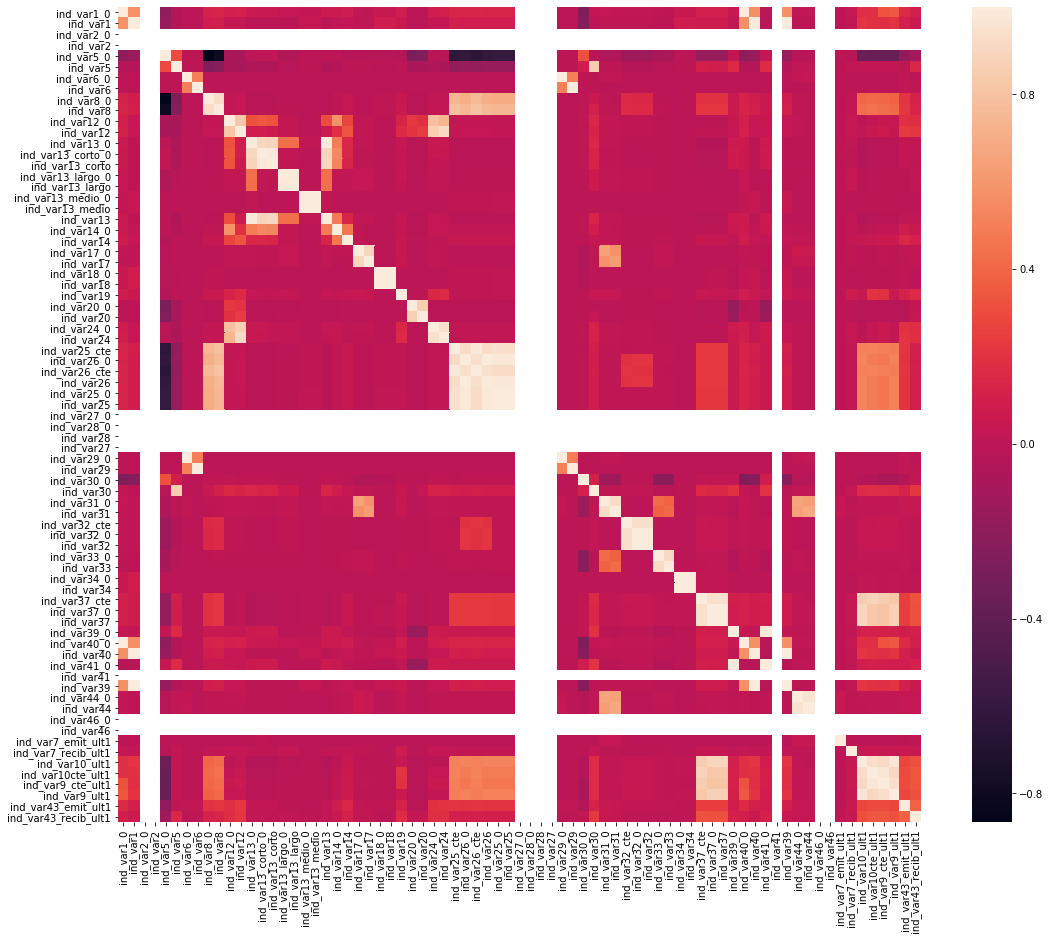

In [18]:
cor_mat = index_train.corr()
f, ax = plt.subplots(figsize=(18, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat, ax=ax);

Таблица показывает, что боль-во признаков не коррелируют между собой, но при этом некоторые имеют очень сильную линейную связь.

In [19]:

threshold = 0.7 #Высокая по шкале Чеддока
important_corrs = (cor_mat[abs(cor_mat) > threshold][cor_mat != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

unique_important_corrs = unique_important_corrs.loc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs

,attribute pair,correlation
42,"(ind_var1_0, ind_var40_0)",0.998256
69,"(ind_var1, ind_var40)",0.994722
32,"(ind_var1, ind_var39)",0.994722
7,"(ind_var13_largo, ind_var13_largo_0)",0.991470
31,"(ind_var39_0, ind_var41_0)",0.989559
38,"(ind_var13, ind_var13_0)",0.985841
3,"(ind_var13_corto, ind_var13_corto_0)",0.982100
70,"(ind_var25, ind_var26)",0.979000
20,"(ind_var25_0, ind_var26_0)",0.979000
13,"(ind_var25, ind_var26_0)",0.979000


Проблема в том, что хоть их и сравнительно немного, как можно заметить на таблице, кол-во связей с сильной корреляцией все равно большое из-за кол-ва признаков. Из-за их анонимности нет четкого и хорошего способа объединить их в один признак, поэтому я воспользуюсь алгоритмами feature selection для определения наиболее полезных признаков

Одна из идей может быть создать признак, считающий количество нулей в строке. (Судя по обсуждению, этот признак может помочь.)

In [20]:
remove = []
for col in train.columns:
    if train[col].std() == 0:
        remove.append(col)

train.drop(remove, axis=1, inplace=True)


remove = []
cols = train.columns
for i in range(len(cols)-1):
    v = train[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,train[cols[j]].values):
            remove.append(cols[j])

train.drop(remove, axis=1, inplace=True)

In [21]:
train.shape

(76020, 308)

In [22]:
#Добавляем поле, в котором будет содержаться количество нулей в строке

# X = train.iloc[:,:-1]
# Y = train.TARGET
X = train.drop(["TARGET","ID"],axis=1)
Y = train.TARGET.values
X['n0'] = (X==0).sum(axis=1)
train['n0'] = X['n0']

## Feature selection

Выберем 200 наиболее полезных признаков исходя из критерия Хи-квадрат.

In [23]:
from sklearn.feature_selection import SelectKBest, chi2 # Хи-квадрат критерий
from sklearn.preprocessing import Binarizer, scale #Бинаризация, стандартизация
from sklearn.preprocessing import normalize

X_bin = Binarizer().fit_transform(scale(X))
selectChi2 = SelectKBest(chi2, k=200 ).fit(X_bin, Y)



D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [24]:
chi2_selected = selectChi2.get_support()
chi2_selected_features = [ f for i,f in enumerate(X.columns) if chi2_selected[i]]

In [25]:
#chi2_selected_features

In [26]:
X_selected = X[chi2_selected_features]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, stratify=Y, test_size=0.33, random_state=42)

In [28]:
X_train.shape

(50933, 200)

In [29]:
X_test.shape

(25087, 200)

In [30]:
Y_train.shape

(50933,)

In [31]:
Y_test.shape

(25087,)

## KNN

In [111]:
for neighbours in [3,7,9,15]:
    for weight in ['uniform','distance']:
        for p in [1,2]:
            print('\nMODEL: neighbours={} weight={} p={}'.format(neighbours,weight,p))
            neigh = KNeighborsClassifier(n_neighbors=neighbours, weights=weight, p=p, n_jobs=-1)
            neigh.fit(X_train,Y_train)
            Y_pred = neigh.predict(X_test)
            Y_pred_proba = neigh.predict_proba(X_test)[:,1]
            print('\nAUC on test:', roc_auc_score(Y_test, Y_pred_proba))
            print('Accuracy on test:', accuracy_score(Y_test, Y_pred))
            print(confusion_matrix(Y_test, Y_pred))
            print(np.sum(Y_pred_proba) / len(Y_pred_proba))


MODEL: neighbours=3 weight=uniform p=1

AUC on test: 0.5730848068963864
Accuracy on test: 0.9539602184398294
[[23901   193]
 [  962    31]]
0.036154183441623154

MODEL: neighbours=3 weight=uniform p=2

AUC on test: 0.5674950644383683
Accuracy on test: 0.95324271535058
[[23892   202]
 [  971    22]]
0.03711085422728903

MODEL: neighbours=3 weight=distance p=1

AUC on test: 0.5722523005104797
Accuracy on test: 0.9506915932554709
[[23810   284]
 [  953    40]]
0.03546037284094629

MODEL: neighbours=3 weight=distance p=2

AUC on test: 0.5671301584738058
Accuracy on test: 0.9498146450352772
[[23797   297]
 [  962    31]]
0.036324376356728666

MODEL: neighbours=7 weight=uniform p=1

AUC on test: 0.6178067799407004
Accuracy on test: 0.9592219077609917
[[24057    37]
 [  986     7]]
0.03606876640718869

MODEL: neighbours=7 weight=uniform p=2

AUC on test: 0.6074245877028633
Accuracy on test: 0.9598198270020329
[[24071    23]
 [  985     8]]
0.03747530024087604

MODEL: neighbours=7 weight=dist

Чем больше соседей выставляем в параметр классификатора, тем менее он чувствителен к наличию экземпляров 1-го класса (недовольный клиент). Он просто понял, что выгоднее всех считать довольными для увеличения метрики. Это одна из основных проблем сильного классового дизбаланса.

В целом могу сказать, что датасет довольно сложный, ибо в нем присутствует много ненужных и зависимых друг от друга признаков, не добавляющие ничего в модель, к тому же виден сильный классовый дизбаланс, из-за чего модель быстро скатывается в предсказание лишь одного класса для увеличения метрик. Считаю, что от алгоритма поиска ближайших соседей надо отказываться и переходить к более сложным и комплексным методам. Пример: XGBoost, CatBoost.

# Задание 2

## XGBoost

In [39]:
import xgboost as xgb

In [96]:
ratio = float(np.sum(Y == 1)) / np.sum(Y==0)
clf = xgb.XGBClassifier(missing=9999999999,
                max_depth = 8,
                n_estimators=1000,
                learning_rate=0.1, 
                nthread=4,
                subsample=1.0,
                colsample_bytree=0.5,
                min_child_weight = 3,
                scale_pos_weight = ratio,
                reg_alpha=0.03,
                seed=10000)
                
clf.fit(X_train, Y_train, early_stopping_rounds=40, eval_metric="auc",
        eval_set=[(X_train, Y_train), (X_test, Y_test)])

[0]	validation_0-auc:0.5	validation_1-auc:0.5
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 40 rounds.
[1]	validation_0-auc:0.5	validation_1-auc:0.5
[2]	validation_0-auc:0.5	validation_1-auc:0.5
[3]	validation_0-auc:0.5	validation_1-auc:0.5
[4]	validation_0-auc:0.5	validation_1-auc:0.5
[5]	validation_0-auc:0.5	validation_1-auc:0.5
[6]	validation_0-auc:0.5	validation_1-auc:0.5
[7]	validation_0-auc:0.5	validation_1-auc:0.5
[8]	validation_0-auc:0.5	validation_1-auc:0.5
[9]	validation_0-auc:0.5	validation_1-auc:0.5
[10]	validation_0-auc:0.5	validation_1-auc:0.5
[11]	validation_0-auc:0.5	validation_1-auc:0.5
[12]	validation_0-auc:0.5	validation_1-auc:0.5
[13]	validation_0-auc:0.5	validation_1-auc:0.5
[14]	validation_0-auc:0.5	validation_1-auc:0.5
[15]	validation_0-auc:0.5	validation_1-auc:0.5
[16]	validation_0-auc:0.5	validation_1-auc:0.5
[17]	validation_0-auc:0.5	validation_1-auc:0.5
[18]	va

[145]	validation_0-auc:0.856507	validation_1-auc:0.839558
[146]	validation_0-auc:0.856608	validation_1-auc:0.83951
[147]	validation_0-auc:0.856774	validation_1-auc:0.839638
[148]	validation_0-auc:0.856919	validation_1-auc:0.839844
[149]	validation_0-auc:0.857001	validation_1-auc:0.83986
[150]	validation_0-auc:0.857144	validation_1-auc:0.839832
[151]	validation_0-auc:0.857274	validation_1-auc:0.839761
[152]	validation_0-auc:0.857318	validation_1-auc:0.839769
[153]	validation_0-auc:0.857445	validation_1-auc:0.83977
[154]	validation_0-auc:0.857534	validation_1-auc:0.839808
[155]	validation_0-auc:0.857606	validation_1-auc:0.839796
[156]	validation_0-auc:0.857709	validation_1-auc:0.839848
[157]	validation_0-auc:0.85783	validation_1-auc:0.839743
[158]	validation_0-auc:0.857903	validation_1-auc:0.839688
[159]	validation_0-auc:0.857996	validation_1-auc:0.839669
[160]	validation_0-auc:0.858095	validation_1-auc:0.839758
[161]	validation_0-auc:0.858207	validation_1-auc:0.839799
[162]	validation_0

[287]	validation_0-auc:0.868939	validation_1-auc:0.840903
[288]	validation_0-auc:0.868966	validation_1-auc:0.840936
[289]	validation_0-auc:0.86905	validation_1-auc:0.840958
[290]	validation_0-auc:0.869091	validation_1-auc:0.840971
[291]	validation_0-auc:0.869165	validation_1-auc:0.840948
[292]	validation_0-auc:0.869273	validation_1-auc:0.84101
[293]	validation_0-auc:0.869329	validation_1-auc:0.841017
[294]	validation_0-auc:0.869351	validation_1-auc:0.841036
[295]	validation_0-auc:0.869447	validation_1-auc:0.840982
[296]	validation_0-auc:0.869502	validation_1-auc:0.840937
[297]	validation_0-auc:0.869574	validation_1-auc:0.841007
[298]	validation_0-auc:0.869669	validation_1-auc:0.840961
[299]	validation_0-auc:0.869707	validation_1-auc:0.841015
[300]	validation_0-auc:0.869827	validation_1-auc:0.840964
[301]	validation_0-auc:0.869863	validation_1-auc:0.840867
[302]	validation_0-auc:0.869894	validation_1-auc:0.840833
[303]	validation_0-auc:0.869943	validation_1-auc:0.84081
[304]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=9999999999, n_estimators=1000,
              n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.03, reg_lambda=1,
              scale_pos_weight=0.04119870706185284, seed=10000, silent=None,
              subsample=1.0, verbosity=1)

In [113]:
Y_pred = clf.predict(X_test)
Y_pred_proba = clf.predict_proba(X_test)[:,1]
print('Final test AUC:', roc_auc_score(Y_test, Y_pred_proba))
print('Accuracy on test:', accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

Final test AUC: 0.8410473296473673
Accuracy on test: 0.9604177462430741
[[24094     0]
 [  993     0]]


Вот применил я XGBoost алгоритм и казалось бы - улучшение!!!
А вот нет. Если я правильно интерпретирую confusion matrix, то XGBoost просто научился выдавать ВСЕМ семплам низкую вероятность недовольства.
Т.е. мы получили такой же случай, что и с KNN, просто вероятности намного ближе находятся к нулю, оттого они не такие шумные, из-за чего и метрика AUC выше. Но по факту видно, что результат такой же - якобы все довольны.

In [114]:
np.sum(Y_pred_proba > 0.1)

0

Т.е. вероятностей недовольства больше, чем 0.1 модель не выдает в принципе.

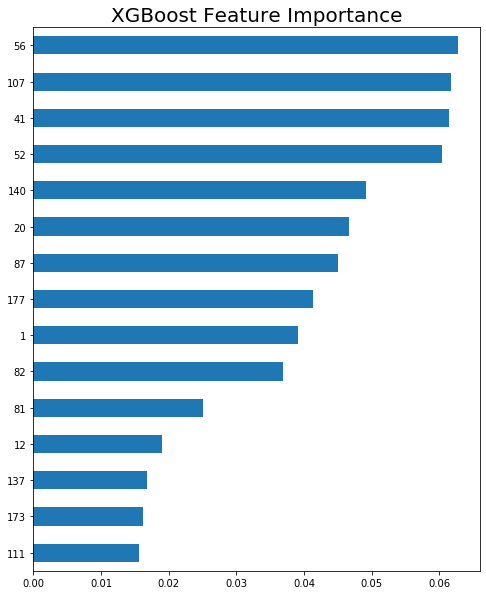

In [64]:
ts = pd.Series(clf.feature_importances_)
#ts.index = ts.reset_index()['index']
ts.sort_values()[-15:].plot(kind="barh", title=("features importance"),figsize=(8,10))

#featp = ts.sort_values()[-15:].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance', fontsize=20);

## Adding PCA components as features

In [121]:
# Add PCA components as features
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

X = train.drop(["TARGET","ID"],axis=1)
X['n0'] = (X==0).sum(axis=1)
X_normalized = normalize(X, axis=0)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
X['PCA1'] = X_pca[:,0]
X['PCA2'] = X_pca[:,1]

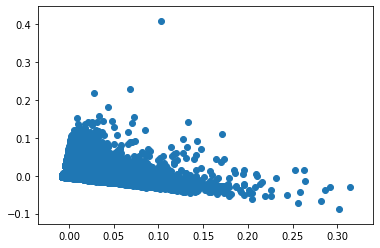

In [122]:
plt.scatter(X['PCA1'],X['PCA2'])

In [130]:
auc_metric = []
for i in range(30):
    X = train.drop(["TARGET","ID"],axis=1)
    X['n0'] = (X==0).sum(axis=1)
    X_normalized = normalize(X, axis=0)
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_normalized)
    for j in range(i):
        X['PCA_'+str(j)] = X_pca[:,j]
    X_bin = Binarizer().fit_transform(scale(X))
    selectChi2 = SelectKBest(chi2, k=200 ).fit(X_bin, Y)
    chi2_selected = selectChi2.get_support()
    chi2_selected_features = [ f for i,f in enumerate(X.columns) if chi2_selected[i]]
    X_selected = X[chi2_selected_features]
    X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, stratify=Y, test_size=0.33, random_state=42)
    ratio = float(np.sum(Y == 1)) / np.sum(Y==0)
    clf = xgb.XGBClassifier(missing=9999999999,
                max_depth = 8,
                n_estimators=1000,
                learning_rate=0.1, 
                nthread=4,
                subsample=1.0,
                colsample_bytree=0.5,
                min_child_weight = 3,
                scale_pos_weight = ratio,
                reg_alpha=0.03,
                seed=10000)
    clf.fit(X_train, Y_train, verbose=False, early_stopping_rounds=40, eval_metric="auc",
        eval_set=[(X_train, Y_train), (X_test, Y_test)])
    auc_metric.append(roc_auc_score(Y_test, clf.predict_proba(X_test)[:,1]))
    print('auc metric added')

D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


D:\Anaconda\envs\facebook_RCNN\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


auc metric added


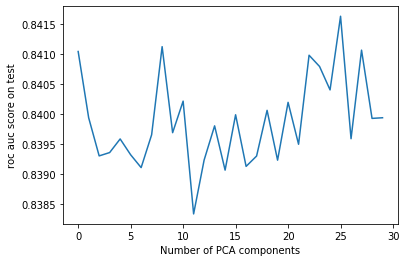

In [133]:
plt.xlabel('Number of PCA components')
plt.ylabel('roc auc score on test')
plt.plot(auc_metric)

судя по графику можно заметить, что кол-во компонент 25 дает наилучшие результаты, повышая auc метрику на 0.0005, поэтому можно сказать, что PCA помог улучшить точность. Однако он не решил основную проблему - понижение вероятности недовольства всех клиентов к нулю. Настолько маленькое улучшение не стоит того, а учитывая, что некоторое кол-во компонент ухудшило результат, к тому же не наблюдается четкой закономерности между улучшением результата и кол-вом компонент, можно сказать, что эти признаки ничего значимого в модель не добавили.

В итоге я получил, что PCA признаки не оказывают существенного или даже ожидаемого воздействия на точность модели.
Хоть они и добавляют датасету вариацию, на данный момент цель модели при обучении заключается
в уменьшении вероятности недовольства клиентов, чему добавление признаков PCA может лишь помешать, что мы и видим
на графике выше.
Хочу сказать, что хоть мои результаты и приближены к наилучшим результатам участников соревнования, я еще не заметил
среди них обсуждения или поднятия вопроса насчет того, что модель просто не детектит недовольство у клиентов вообще.
И ни в одной из публично выложенных тетрадок они не выводят и не анализируют матрицу ошибок, показывая лишь ту метрику, которую
просят организаторы.

К тому же, просмотрев их submission, прикрепленный к публичным тетрадкам я заметил те же очень низкие вероятности, что
наводит меня на мысль, что для достижения лучших показателей люди приняли решение схитрить и не пытаться детектить
меньший класс, а попытаться наоборот - сделать ему как можно меньшую вероятность.
Это даст меньшую ошибку на правильных предсказаниях, но большую на неправильных. Из-за большого классового дизбаланса
auc метрика в итоге повысится.

Идеи для решения проблемы:

1.Создать собственную метрику с увеличенным штрафом за предсказание недовольного клиента как довольного

2.Использование нейронных сетей(???)